<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries for feature engineering and model training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print('✔️ Libraries imported successfully!')

✔️ Libraries imported successfully!


In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
!unzip -u "/content/train.csv.zip"

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [ ]:
df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [ ]:
80810/(1225312 + 80810)

0.06187017751787352

In [ ]:
df_bad = df[df["target"] == 1].sample(10000)
df_good = df[df["target"] == 0].sample(50000)
df_new = pd.concat([df_bad, df_good])

In [ ]:
10000/(10000 + 50000)

0.16666666666666666

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 913223 to 478619
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qid            60000 non-null  object
 1   question_text  60000 non-null  object
 2   target         60000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
df_new.to_csv("quora_question_df.csv", index = False)

In [ ]:
df = pd.read_csv("/content/quora_question_df.csv")

In [ ]:
df.tail()

,qid,question_text,target
59995,e150fde70b65a8487a3c,What went wrong with Rocket Internet?,0
59996,d4850cc437b3d0105408,"Why is being ""dead inside"" frowned upon?",0
59997,12a08a0dd742eed811d9,Is Mathematics necessary in life?,0
59998,769ea9ce327d15d77de6,Can you smell carbon monoxide?,0
59999,5db9fe4f3af5d25d2adc,What shall be my strategy for SSC CGL I I have...,0


In [ ]:
df.question_text.sample(10)

53388      What are some nonstandard units of measurement?
18663    Sir if you believe in karma theory, what about...
34935         Do you get scared whenever you see a hearse?
10626    What is the correct way of cutting out a plant...
22464    What other anime are there with ballet other t...
59880                      How do you make a crystal ball?
4472     My wife is pregnant but I hate children. How s...
30317    How can I find probability without knowing the...
2802            Rejuvalex: how each constituent functions?
41336                       When did I activate this fone?
Name: question_text, dtype: object

- There are various comma and fullstop in question_text
  - remove punctuations
- question_text are in mixed case (i.e lower and upper)
  - convert to lower case
- There are various helper words in the question_text
 - remove stopwords

In [ ]:
df.tail()

,qid,question_text,target
59995,e150fde70b65a8487a3c,What went wrong with Rocket Internet?,0
59996,d4850cc437b3d0105408,"Why is being ""dead inside"" frowned upon?",0
59997,12a08a0dd742eed811d9,Is Mathematics necessary in life?,0
59998,769ea9ce327d15d77de6,Can you smell carbon monoxide?,0
59999,5db9fe4f3af5d25d2adc,What shall be my strategy for SSC CGL I I have...,0


In [ ]:
# remove punctuations
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
q = '''Why is_being "dead-inside" frowned @ upon?'''
q

'Why is_being "dead-inside" frowned @ upon?'

In [ ]:
def rem_punc(q):
  for chr in q:
    if chr in string.punctuation:
      q = q.replace(chr, "")
    elif chr in ["0","1","2","3","4","5","6","7","8","9"]:# "0123456789"
      q = q.replace(chr, "")
  q = q.lower()
  return q

In [ ]:
df["questions_rem_punc"] = df["question_text"].apply(lambda x: rem_punc(x))
df.tail()

,qid,question_text,target,questions_rem_punc,question_clean
59995,e150fde70b65a8487a3c,What went wrong with Rocket Internet?,0,what went wrong with rocket internet,went wrong rocket internet
59996,d4850cc437b3d0105408,"Why is being ""dead inside"" frowned upon?",0,why is being dead inside frowned upon,dead inside frowned upon
59997,12a08a0dd742eed811d9,Is Mathematics necessary in life?,0,is mathematics necessary in life,mathematics necessary life
59998,769ea9ce327d15d77de6,Can you smell carbon monoxide?,0,can you smell carbon monoxide,smell carbon monoxide
59999,5db9fe4f3af5d25d2adc,What shall be my strategy for SSC CGL I I have...,0,what shall be my strategy for ssc cgl i i have...,shall strategy ssc cgl 3 years appear exam


In [ ]:
# q = "is mathematics necessary in life"
stop_word = stopwords.words("english")
def rem_stopword(q):
  temp_list = []
  for word in q.split():
    if word not in stop_word:
      temp_list.append(word)

  q = " ".join(temp_list)
  return q

In [ ]:
df["question_clean"] = df["questions_rem_punc"].apply(lambda x: rem_stopword(x))
df.tail()

,qid,question_text,target,questions_rem_punc,question_clean
59995,e150fde70b65a8487a3c,What went wrong with Rocket Internet?,0,what went wrong with rocket internet,went wrong rocket internet
59996,d4850cc437b3d0105408,"Why is being ""dead inside"" frowned upon?",0,why is being dead inside frowned upon,dead inside frowned upon
59997,12a08a0dd742eed811d9,Is Mathematics necessary in life?,0,is mathematics necessary in life,mathematics necessary life
59998,769ea9ce327d15d77de6,Can you smell carbon monoxide?,0,can you smell carbon monoxide,smell carbon monoxide
59999,5db9fe4f3af5d25d2adc,What shall be my strategy for SSC CGL I I have...,0,what shall be my strategy for ssc cgl i i have...,shall strategy ssc cgl years appear exam


In [ ]:
df[["question_text","question_clean"]][-60:-50]

,question_text,question_clean
59940,Why do fan rotate only in circular fashion and...,fan rotate circular fashion triangular square
59941,What causes blood clots after dilation and cur...,causes blood clots dilation curettage
59942,Is it okay to drink energy drinks?,okay drink energy drinks
59943,When did the Allies of World War I make the di...,allies world war make dismemberment austriahun...
59944,What is the procedure of booking you seat in N...,procedure booking seat nlu declaring clat result
59945,What is the best company you can get from SRM....,best company get srm cse
59946,When was the last time you made a mixtape?,last time made mixtape
59947,How do I get review units as a new YouTuber?,get review units new youtuber
59948,How I can complete my MBA 4th sem?,complete mba th sem
59949,Is a 2-3 month gap between menstruation normal...,month gap menstruation normal teens


In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

stemming is the process of converting a word to its basic form or stem. This will help model to generalise words in reviews and give better performance. Let's look an example

In [ ]:
df.tail(10)

,qid,question_text,target,questions_rem_punc,question_clean
59990,6c35984b443d1429ade9,What elements should I include in an outdoor k...,0,what elements should i include in an outdoor k...,elements include outdoor kitchen
59991,ca63417e3ac988286dcf,What was the probability of the Shuttle failin...,0,what was the probability of the shuttle failin...,probability shuttle failing land runway
59992,9e5cec9fff94f7503d93,Has Modi taken any step to prevent corruption ...,0,has modi taken any step to prevent corruption ...,modi taken step prevent corruption except demo...
59993,bc41f4032d5c958672d2,What is the most inappropriate outfit someone ...,0,what is the most inappropriate outfit someone ...,inappropriate outfit someone worn workplace
59994,8522f7a3da5b9b2286e2,Who pays the Uber driver?,0,who pays the uber driver,pays uber driver
59995,e150fde70b65a8487a3c,What went wrong with Rocket Internet?,0,what went wrong with rocket internet,went wrong rocket internet
59996,d4850cc437b3d0105408,"Why is being ""dead inside"" frowned upon?",0,why is being dead inside frowned upon,dead inside frowned upon
59997,12a08a0dd742eed811d9,Is Mathematics necessary in life?,0,is mathematics necessary in life,mathematics necessary life
59998,769ea9ce327d15d77de6,Can you smell carbon monoxide?,0,can you smell carbon monoxide,smell carbon monoxide
59999,5db9fe4f3af5d25d2adc,What shall be my strategy for SSC CGL I I have...,0,what shall be my strategy for ssc cgl i i have...,shall strategy ssc cgl years appear exam


In [ ]:
# stemming example
words = ["go", "going", "gone", "goes"]
for word in words:
    print(word,"--->",ps.stem(word))

go ---> go
going ---> go
gone ---> gone
goes ---> goe


In [ ]:
def stem(q):
  temp_list = []
  # q = "shall strategy ssc cgl 3 years appear exam"
  for word in q.split():
    temp_list.append(ps.stem(word))

  q = " ".join(temp_list)
  return q

In [ ]:
df["question_stem"] = df["question_clean"].apply(lambda x : stem(x))
df[["question_text","question_stem"]][-70:-60]

,question_text,question_stem
59930,What kind Animals did they use in Arab Calipha...,kind anim use arab caliph
59931,What are the most important features of Wester...,import featur western philosophi
59932,What are the main reasons for a pet snake to h...,main reason pet snake pink belli
59933,Have any of you met a man who called the polic...,met man call polic nake woman
59934,"In Groundhog Day (1993), is the time loop caus...",groundhog day time loop caus holiday icon
59935,How do I find critical and non critical races?,find critic non critic race
59936,How are cysts developed in your labia minora?,cyst develop labia minora
59937,Why do I feel a deep longing for my twin flame...,feel deep long twin flame even though never met
59938,What is the job of a life coach and how can I ...,job life coach becom life coach
59939,What if you get married after your Visa is can...,get marri visa cancel


In [ ]:
# let's look in stop_word set
stop_words

In [ ]:
def text_transformation(usr_question):

    mod_question = usr_question
    # return only A-Z,a-z and " " in our usr_question
    mod_question = re.sub('[^a-zA-Z]',' ',str(mod_question))
    # convert mod_question in lower case
    mod_question = mod_question.lower()
    # split mod_question on the basis of space
    mod_question = mod_question.split()
    # feed splitted individual words to stemmer which are not in stop_words 
    mod_question = [ps.stem(word) for word in mod_question if word not in stop_words]
    #return stemmed reviews
    return (' '.join(str(y) for y in mod_question))

In [ ]:
# Creating new column "stem_review"
df['stem_question'] = df['question_text'].apply(lambda x: text_transformation(x))

In [ ]:
df['stem_question'].tail()

59995                 went wrong rocket internet
59996                      dead insid frown upon
59997                    mathemat necessari life
59998                       smell carbon monoxid
59999    shall strategi ssc cgl year appear exam
Name: stem_question, dtype: object

In [ ]:
df.columns

Index(['qid', 'question_text', 'target', 'questions_rem_punc',
       'question_clean', 'question_stem'],
      dtype='object')

In [ ]:
# train_test split
X = df['question_stem']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [ ]:
#cheking class bifuraction

print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

print("class bifurcation for y_train ", y_train.value_counts()/ len(y_train))
print("class bifurcation for y_test ", y_test.value_counts()/ len(y_test))

X_train : (40200,)
X_test : (19800,)
y_train : (40200,)
y_test : (19800,)
class bifurcation for y_train  0    0.83495
1    0.16505
Name: target, dtype: float64
class bifurcation for y_train  0    0.830051
1    0.169949
Name: target, dtype: float64


In [ ]:
# We can plot WordCloud to get an intution of the important keywords in our reviews
def word_count(x):
  # plt.rcParams['figure.figsize'] = 15,8
  plt.figure(figsize = (15,8))
  word_cloud = ""
  for row in x:
      for word in row:
          word_cloud+=" ".join(word)
  # print(word_cloud)
  wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
  plt.imshow(wordcloud)

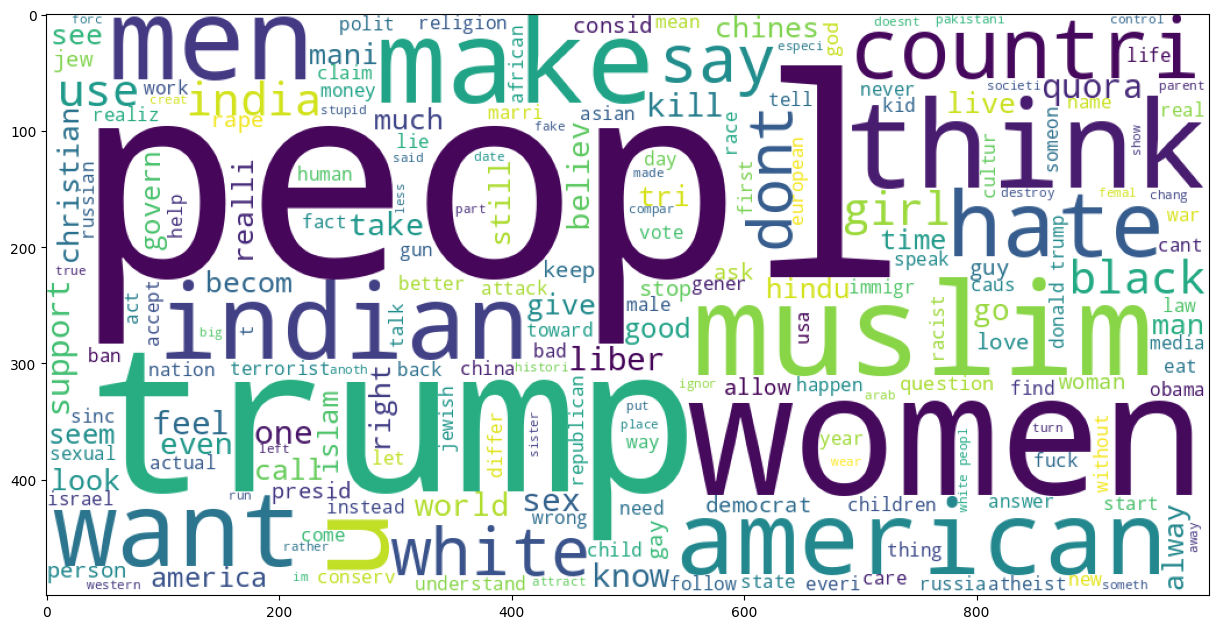

In [ ]:
useless_question = df["question_stem"][df["target"] == 1]
# useless_question
word_count(useless_question)

In [ ]:
# countVectorizer transforrm text data to vectors, so that model can process data
cv = CountVectorizer(ngram_range=(1,2))
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

In [ ]:
X_train_transformed.toarray().shape

(40200, 205447)

In [ ]:
print("Number of records in X_trains : ",len(X_train))

Number of records in X_trains :  40200


In [ ]:
X_train_transformed

<40200x201184 sparse matrix of type '<class 'numpy.int64'>'
	with 478875 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_transformed, y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test_transformed)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
clf.score(X_test_transformed, y_test)

0.8877777777777778

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93     16435
           1       0.75      0.51      0.61      3365

    accuracy                           0.89     19800
   macro avg       0.83      0.74      0.77     19800
weighted avg       0.88      0.89      0.88     19800



In [ ]:
def confusion(y_test, y_pred):

    sns.set_theme(style="whitegrid")
    plt.rcParams["figure.figsize"] = [7, 4]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    cm = sns.heatmap(df_cm,annot=True, fmt='g')
    cm.plot()

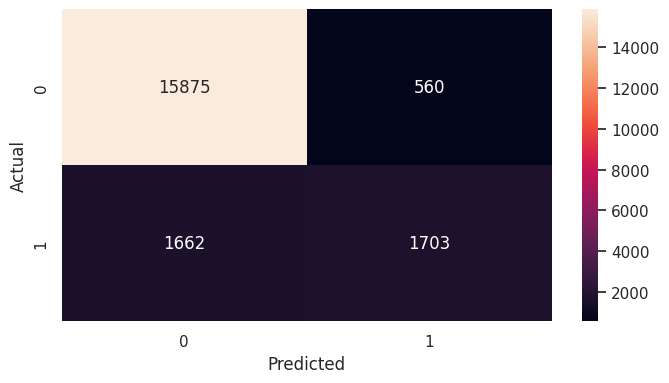

In [ ]:
confusion(y_test, y_pred)